### Import des packages

In [1]:
# Imports classiques
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Scrapping
from bs4 import BeautifulSoup
import requests 
import json

# Visualisation
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

# Utils
from pprint import pprint
from datetime import datetime
import time
import collections
import unittest
from operator import itemgetter
import re
from multiprocessing import Pool
import concurrent.futures
from slugify import slugify

# Machine learning
import sklearn 
from sklearn import linear_model
import statsmodels.api as sm

### Go hackathon !

In [2]:
url_wiki_list = "https://fr.wikipedia.org/wiki/Liste_des_singles_les_plus_vendus"

def get_request_from_url_and_build_soup(url):
    request = requests.get(url)
    if request.status_code == 200:
        html_doc = request.text
        soup = BeautifulSoup(html_doc, "html.parser")
        return soup
    else:
        print("The website is not responding : " + str(request.status_code))

In [44]:
soup = get_request_from_url_and_build_soup(url_wiki_list)
tbl_10 = soup.find("span", id="10_millions_d.27exemplaires_vendus_ou_plus").findNext("table")
tbl_5 = soup.find("span", id="5_millions_d.27exemplaires_vendus_ou_plus").findNext("table")
list_tr = tbl_10.findAll("tr") + tbl_5.findAll("tr")

list_hits =[]

for tr in list_tr:
    if tr.find("th") is None:
        td_hit = tr.findAll("td")
        #pprint(td_hit[0].__dict__)
        if list(td_hit[0].children)[0].find("a") !=-1:
            hit_link_artist = "https://fr.wikipedia.org" + td_hit[0].findNext("a").attrs['href']
            hit_artist = td_hit[0].findNext("a").get_text()
            if str.find(hit_artist, "[")!=-1:
                hit_link_artist = ""
                hit_artist = td_hit[0].get_text()
            
            if list(td_hit[0].children)[0] is None:
                hit_link_artist = ""
                hit_artist = td_hit[0].get_text()
        else:
            hit_link_artist = ""
            hit_artist = list(td_hit[0].children)[0]
        
        hit_link_song = "https://fr.wikipedia.org" + td_hit[1].findNext("a").attrs['href']
        if td_hit[1].findNext("i").childen is not None:
            print(td_hit[1].findNext("a"))
            hit_song = td_hit[1].findNext("a").get_text()
        else:
            hit_song = td_hit[1].findNext("i").get_text()
        hit_annee = td_hit[2].get_text()
        hit_ventes_raw = td_hit[3].get_text()
        hit_ventes = float(hit_ventes_raw[:str.find(hit_ventes_raw, "[")])
        list_hits.append([hit_link_artist, hit_artist,hit_link_song,hit_song,hit_annee,hit_ventes])
        
df_song = pd.DataFrame(list_hits)
list_cols = ["Lien_artiste", "Artiste","Lien_titre","Titre","Année","Ventes" ]
df_song.columns=list_cols
df_song2 = df_song[["Artiste","Titre","Année","Ventes"]]

df_song2.to_csv("BestHits.csv")
df_song2

,Artiste,Titre,Année,Ventes
0,Bing Crosby,White Christmas,1942,50.0
1,Elton John,Candle in the Wind 1997,1997,33.0
2,Mungo Jerry,In the Summertime,1970,30.0
3,Bing Crosby,Silent Night,1935,30.0
4,Bill Haley,Rock Around the Clock,1954,25.0
5,Domenico Modugno,Nel blu dipinto di blu,1958,22.0
6,Whitney Houston,I Will Always Love You,1992,20.0
7,Elvis Presley,It's Now or Never,1960,20.0
8,USA for Africa,We Are the World,1985,20.0
9,The Ink Spots,If I Didn't Care,1939,19.0


In [56]:
ind = np.array(list(df_song2.index))
df_song2["NewVentes"] = df_song2["Ventes"] * 1000000 - ind
df_song2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Artiste,Titre,Année,Ventes,NewVentes
0,Bing Crosby,White Christmas,1942,50.0,50000000.0
1,Elton John,Candle in the Wind 1997,1997,33.0,32999999.0
2,Mungo Jerry,In the Summertime,1970,30.0,29999998.0
3,Bing Crosby,Silent Night,1935,30.0,29999997.0
4,Bill Haley,Rock Around the Clock,1954,25.0,24999996.0
5,Domenico Modugno,Nel blu dipinto di blu,1958,22.0,21999995.0
6,Whitney Houston,I Will Always Love You,1992,20.0,19999994.0
7,Elvis Presley,It's Now or Never,1960,20.0,19999993.0
8,USA for Africa,We Are the World,1985,20.0,19999992.0
9,The Ink Spots,If I Didn't Care,1939,19.0,18999991.0


In [57]:
df_song2.to_csv("BestHits.csv")

In [103]:
url_API = "https://orion.apiseeds.com/api/music/lyric/{}/{}?apikey="
API_KEY = "8k4HoeuGrwIQjSRcXWW1tRgjcW9BFpTKXqFVWBeRuStMcVYxM99s11dH9pQGzfuE"

def get_request_from_url_and_build_json(url_final):
    request = requests.get(url_final)
    if request.status_code == 200:
        jsonObject = json.loads(request.text)
        return jsonObject
    else:
        #print("erreur requête json : ", str(request.status_code), request.text)
        return None

In [108]:
voc=[]
for i in np.arange(len(df_song2)):
    url_final = (url_API + API_KEY).format(df_song2.iloc[i]["Artiste"],df_song2.iloc[i]["Titre"])
    lyrics_json = get_request_from_url_and_build_json(url_final)
    print(wait)
    if lyrics_json is not None:
        lyrics_json = lyrics_json["result"]["track"]["text"].replace("\n"," ")
        lyrics_json = lyrics_json.replace("\r"," ").replace("[","").replace("]","").replace("verse","")
        voc.append(lyrics_json)
    else:
        print("Pas de paroles : {} {}".format(df_song2.iloc[i]["Artiste"],df_song2.iloc[i]["Titre"]))

['.']
['.', '.']
['.', '.', '.']
['.', '.', '.', '.']
Pas de paroles : Bing Crosby Silent Night
['.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
Pas de paroles : Mariah Carey All I Want for Christmas Is You
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
Pas de paroles : Modern Talking You're My Heart, You're My Soul
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
Pas de paroles : My Boy Lollipop My Boy Lollipop
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
Pas de paroles : Mitch Miller March from the River Kwai
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'

In [109]:
len(voc)

117

In [111]:
voc2 = voc

In [115]:
voc2

['I\'m dreaming of a white Christmas, Just like the ones I used to know. Where those tree-tops glisten, And children listen To hear sleighbells in the snow.  I\'m dreaming of a white Christmas, With every Christmas card I write, "May your days be merry and bright, And may all your Christmases be white".  I\'m dreaming of a white Christmas, Just like the ones I used to know. May your days may your days may your days be merry and bright, And may all your Christmases be white. ',
 "Verse 1 Goodbye England's rose May you ever grow in our hearts You were the grace that placed itself Where lives were torn apart You called out to our country And you whispered to those in pain Now you belong to heaven And the stars spell out your name  Chorus And it seems to me you lived your life Like a candle in the wind Never fading with the sunset When the rain set in And your footsteps will always fall here Along England's greenest hills Your candle's burned out long before Your legend ever will  Verse 2 

### Analyse en nuage de mots
https://voyant-tools.org

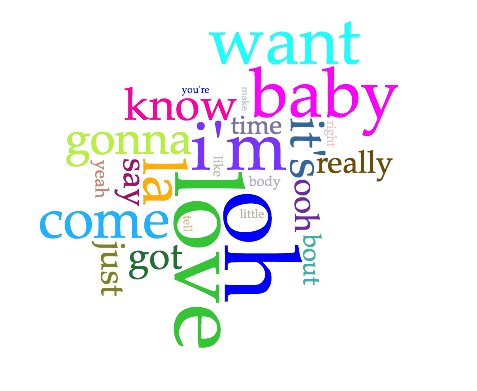

In [118]:
from IPython.display import Image
Image(filename='BestWords.png')

 ### Charger les données

In [ ]:
# Read from Excel
fichier = "chemin/nom_fichier"
df = pd.read_excel(fichier, sheet_name="feuille", skiprows=2)

# Read From csv
df = pd.read_csv('fichier.csv',sep=';',skiprows=[1])

# Read From json
url_api = "url"
request = requests.get(url_api)
df = pd.read_json(request.text)

# Read from HTML
tblvilles = soup.find(id="produit-tableau-T16F014T4")
df = pd.read_html(str(tblvilles))[0]

# Write to csv
df.to_csv("fichier.csv")

### Operations sur DataFrame

In [ ]:
# Créer les DataFrame
list_cols = ["col1", "col2"]
MyIndex = ["ind1","ind2"]
df = pd.DataFrame(list_or_dict, columns=list_cols, index=MyIndex)

# Renommage des colonnes
list_cols = ["col1", "col2"]
df.columns=list_cols

# Renommer les colonnes par index
df = df.rename({0:'name1', 1:'name2', 2:'name3' },axis='columns')

# Remplacer une valeur NA par 0 missing value
dft["dosage"] = dft[1].fillna(0).astype(int)

# Conversion de colonne en type
dfpopDépartement["PopulationTotale"] = dfpopDépartement["PopulationTotale"].astype(int)

# Sélection de colonnes
population = population[['Nom de la commune','Population totale','Code département']]

# Garder les lignes qui ne contiennent pas "Total" dans le département
dfsanstotal = df[~df["Département"].str.contains("TOTAL")]
population = population[population['Code département'] == '14']

# Conversion des colonne en numérique et remplace NA par NAN
dfsanstotal['Honoraire']=pd.to_numeric(dfsanstotal['Honoraire'].loc[:], errors='coerce', downcast="integer")
dfsanstotal['Dépassement']=pd.to_numeric(dfsanstotal['Dépassement'], errors='coerce', downcast="integer")

# Supprimer les NA et ne conserver que les colonnes dont l'effectif est non nul
dfNoNa = dfsanstotal.dropna()
dfclean = dfNoNa[dfNoNa['Effectif']!=0]

# Créer un DataFrame qui ne contient que les valeurs uniques d'une colonne
dfDépartements = pd.DataFrame(columns=['Département'], data=dfclean.Département.unique())

# Tri
population = population.sort_values(by=['Population totale'],ascending=False)

# Splitter une colonne en 2 selon une regexp ou un séparateur
df[['denom','conditionnement']] = df['denomination'].str.split(',',expand=True)
df['conditionnement'] = df['conditionnement'].str.strip()

# Créer une série à partir d'une colonne et d'une regexp
reg = r",([\w\s]*)" # les mots après la virgule séparés par des espaces
serie = df["denomination"]
serie.str.extract(reg)

# Créer 3 colonnes à patir des données d'une colonne dont on extrait des info par regexp
cameras[['Brand','Model_without_brand']] = cameras['Model'].str.extract(r'(\w+) (.*)')

# Requête sur les lignes vérifiant une condition
dft["mul"] = dft["mul"].where(dft[2].str.strip() == "g", 1)

# Utilisation du group by and aggrégation
NumCols2= ["col1","col2",]
mean_price = cameras.groupby('Brand')[NumCols2].mean()
cameras.groupby('Brand').agg({'Price':np.mean ,'Max resolution':np.max})

# Réduire le nombre de colonnes en ajoutant des lignes
pd.melt(cameras,['Model'],cameras.columns[1:])

# Pivot
df = pd.DataFrame(releves, columns=['day','metric','value'])
df_wide = df.pivot(index='day',columns='metric',values='value')

### Scrapping et API

In [4]:
# Build soup
def get_request_from_url_and_build_soup(url):
    request = requests.get(url)
    if request.status_code == 200:
        html_doc = request.text
        soup = BeautifulSoup(html_doc, "html.parser")
        return soup
    else:
        print("The website is not responding : " + str(request.status_code))

# Usage 
def get_all_links_from_url(url):
    soup = get_request_from_url_and_build_soup(url)
    
    # Soup and find
    info = soup.find_all("th", text=re.compile("#[0-9]"))

    all_links = list(map(lambda x : (x.get_text()[1:],
                                      x.findNext("a"),
                                      x.findNext("a").get_text()), info))
    return list(zip(*all_links))

def get_all_links_for_query(query):

    url = website_prefix + "/rechercher/"
    res = requests.post(url, data = {'q': query })
    soup = get_request_from_url_and_build_soup(res)
    specific_class = "c-article-flux__title"
    all_links = map(lambda x : x.attrs['href'] , soup.find_all("a", class_= specific_class))

    return all_links
        
def get_request_from_url_and_build_json(url):
    headers = {'Authorization': 'token ' + API_KEY}
    request = requests.get(url, headers=headers)
    if request.status_code == 200:
        jsonObject = json.loads(request.text)
        return jsonObject
    else:
        print("erreur requête json : ", str(request.status_code), request.text)
        return

# Usage funct json
def get_nb_repos_for_account(url):
    response_object = get_request_from_url_and_build_json(url)
    nbrepos = 0
    if len(response_object) != 0:
        nbrepos = response_object['public_repos']
        return nbrepos
    else:
        # cas de 0 repository
        return 0

# Formattage URL
API_KEY = open("token.txt", "r").read()
url_template = "https://maps.googleapis.com/maps/api/distancematrix/json?origins={}&destinations={}&key={}"
origins = '|'.join(population['Nom de la commune'])
destinations = '|'.join(population['Nom de la commune'])
url_formatted = url_template.format(origins, destinations, API_KEY)
results =  requests.get(url_formatted).json()

In [ ]:
# Beautiful soup

# Find by HTML tag and tag content
sales_tag = soup.find(lambda tag: tag.name == "td" and "Quarter Ending Dec-18" in tag.text)
sales_values_tag = list(sales_tag.parent.children)
sales_nb_estimate = sales_values_tag[3].text

# Find with regexp
pattern = re.compile(r'text to find')
SharesOwned = soup.find("td", text=pattern).findNext("td").text[:-1]

# Find by tag and class
share_price = soup.find("span", class_="nasdaqChangeHeader").findNext("span").text.strip()

# Find by id and read HTML
tblvilles = soup.find(id="produit-tableau-T16F014T4")
df = pd.read_html(str(tblvilles))[0]

# Get telephone number and concatenate them
tel = soup.find("div", class_="phoneNumberContent").findNext("span").contents[0].strip()
regTel = re.compile(r"[0-9 ]{2,}")
tel = regTel.findall(tel)
tel = "".join(tel)

### Graphiques

In [ ]:
# Barchart
plt.figure(figsize=(16,5))
dfGroupbySpecialite["%effectif"].sort_values(ascending=False).plot(kind='bar')
# 2 colonnes
dfGroupbySpecialite[["%effectif", "voldepass"]].sort_values(by='%effectif',ascending=False).plot(kind='bar')

plt.xticks(rotation=90)
plt.ylabel('Effectif')
plt.title("Répartition des effectifs par spécialité")
plt.show()

### Data, Conversion, utilitaires

In [7]:
# string to int
def _convert_string_to_int_or_nan(string):
    if string is not "" and string.find("-") == -1:
        return int(string)
    else:
        return NA

# Date
now = datetime.now()
dateDuJour = str(now.day) + "/" + str(now.month) + "/" + str(now.year)

# Concaténation de chaine séparée par un caractère
origins = '|'.join(population['Nom de la commune'])

# Tester une Regexp
reg = r",([\w\s]*)"
denom = "PARACETAMOL MYLAN 500 mg, comprimé"
re.findall(reg,denom)

### Timing

In [ ]:
start = time.time()
# Functionc call
end = time.time()
print("time to perform operation : {:.2f} seconds".format(round(end - start, 2)))

### Multi-thread

In [ ]:
# Using Pool and map
start = time.time()
p = Pool(5)
print(list(p.map(funct, parameter)))
end = time.time()
print('time', end - start)

start = time.time()

# Using concurrent
with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:

    # We launch the seperate threads
    future_count = {executor.submit(function_to_call, name): name for name in df[2]}

    # We loop over the completed thread
    for counter in concurrent.futures.as_completed(future_count):
        nameContributor = future_count[counter]
        try:
            # Here counter is the return of the function_to_call
            total_star, nbRepos = counter.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (nameContributor, exc))
        else:
            # Do something with the data !
            average_star_count = int(total_star / nbRepos) if nbRepos != 0 else 0
            dictData[nameContributor] = [nbRepos, total_star, average_star_count]

end = time.time()
print("time to count the stars for all 256 contributors : {:.2f} minutes".format((end - start)/60))
